In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
CALIBRATION_BASEPATH = 'data/measurment-1/calibrations/'
CALIBRATION_FILE = '230320-010-calibration-A-20dB.wav'

calibration_path = os.path.join(CALIBRATION_BASEPATH, CALIBRATION_FILE)

In [3]:
calibration, sr = librosa.load(calibration_path, sr=None, mono=False)

length = calibration.shape[0] / sr
print('Calibration length: {:.2f} seconds'.format(length))
print('Sample rate: {} Hz'.format(sr))

Calibration length: 12.00 seconds
Sample rate: 48000 Hz


In [4]:
AUDIO_BASEPATH = 'data/measurment-1/jumps/'
AUDIO_FILE = '230320-009-jump-1.wav'

audio_path = os.path.join(AUDIO_BASEPATH, AUDIO_FILE)

In [5]:
audio, sr = librosa.load(audio_path, sr=None, mono=False)

length = audio.shape[1] / sr

print('Audio length: {:.2f} seconds'.format(length))
print('Sample rate: {} Hz'.format(sr))
print('Hydrophone A')

Audio(audio[0], rate=sr)

Audio length: 20.00 seconds
Sample rate: 48000 Hz
Hydrophone A


In [6]:
audio, sr = librosa.load(audio_path, sr=None, mono=False)

length = audio.shape[1] / sr

print('Audio length: {:.2f} seconds'.format(length))
print('Sample rate: {} Hz'.format(sr))
print('Hydrophone B')

Audio(audio[1], rate=sr)

Audio length: 20.00 seconds
Sample rate: 48000 Hz
Hydrophone B


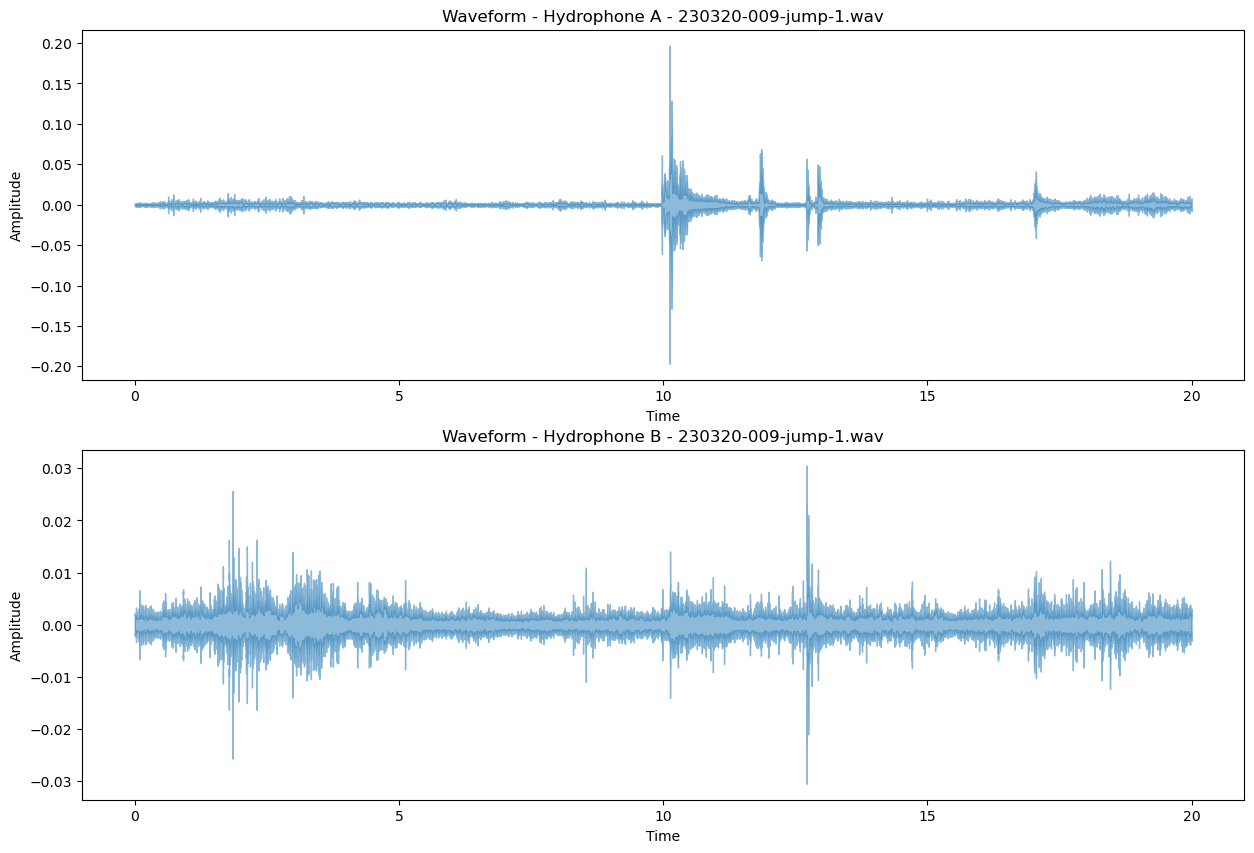

In [7]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
librosa.display.waveshow(audio[0], sr=sr, alpha=0.5)
plt.title(f'Waveform - Hydrophone A - {AUDIO_FILE}')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(audio[1], sr=sr, alpha=0.5)
plt.title(f'Waveform - Hydrophone B - {AUDIO_FILE}')
plt.ylabel('Amplitude')

plt.show()

In [8]:
NFFT = 1024
HOP_LENGTH = 512
TOP_DB = 80

spectrogram = librosa.stft(audio, n_fft=NFFT, hop_length=HOP_LENGTH)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), top_db=TOP_DB, ref=np.max) # TODO: ref=np.max is propebly not correct

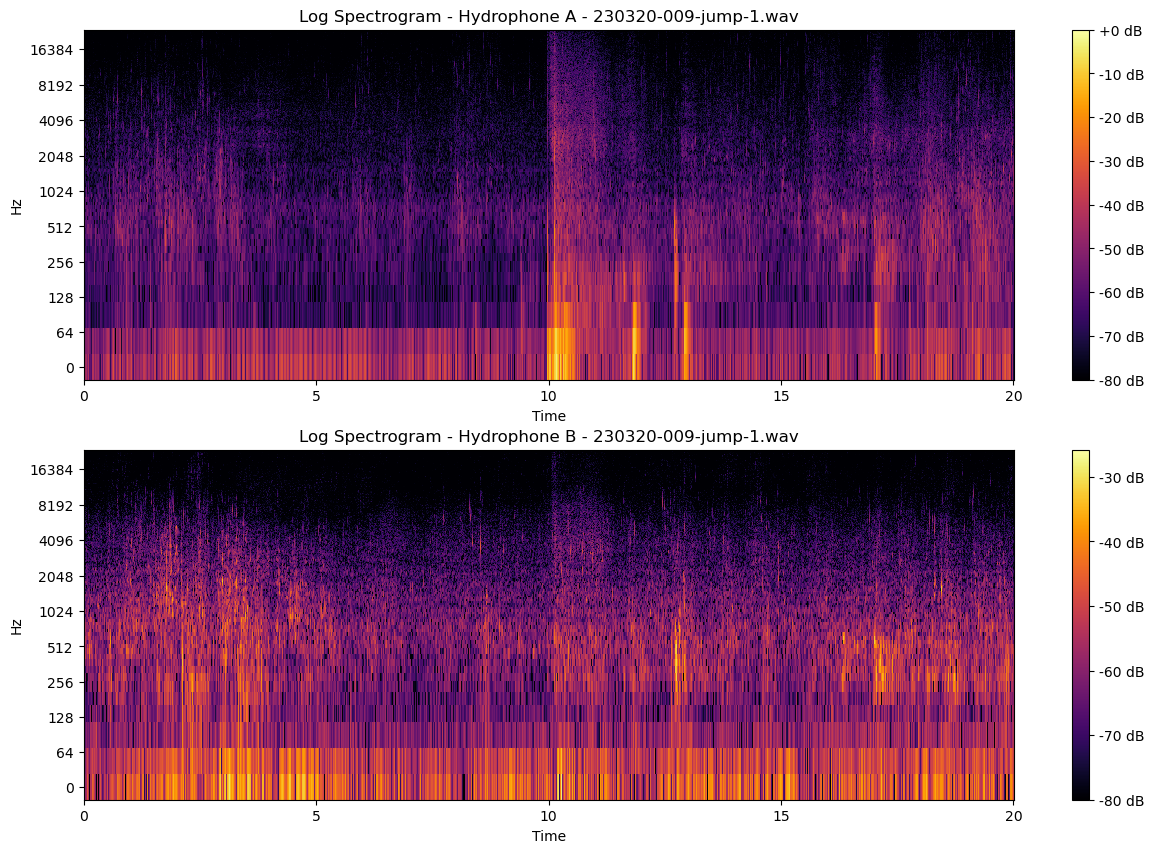

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
im = librosa.display.specshow(spectrogram_db[0], sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar(im, format='%+2.0f dB')
plt.title(f'Log Spectrogram - Hydrophone A - {AUDIO_FILE}')

plt.subplot(2, 1, 2)
im = librosa.display.specshow(spectrogram_db[1], sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar(im, format='%+2.0f dB')
plt.title(f'Log Spectrogram - Hydrophone B - {AUDIO_FILE}')

plt.show()

In [10]:
REF_EFF = 20e-5
CAL_SPL = 128 # dB

calibration_rms = np.sqrt(np.mean(calibration**2))
uncalibrated_spl = 20 * np.log10(calibration_rms / REF_EFF)
print('Uncalibrated SPL: {:.2f} dB'.format(uncalibrated_spl))

gain_db = uncalibrated_spl - CAL_SPL
calibration_gain = 10**(gain_db / 20)
print('Gain: {:.2f} dB'.format(gain_db))

Uncalibrated SPL: 53.85 dB
Gain: -74.15 dB


In [11]:
FRAME_SIZE = 2048
HOP_LENGTH = 1024

rms = librosa.feature.rms(y=audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)
spl = librosa.amplitude_to_db(rms, ref=calibration_gain).reshape(2, -1)

time = librosa.times_like(spl, sr=sr, hop_length=HOP_LENGTH)

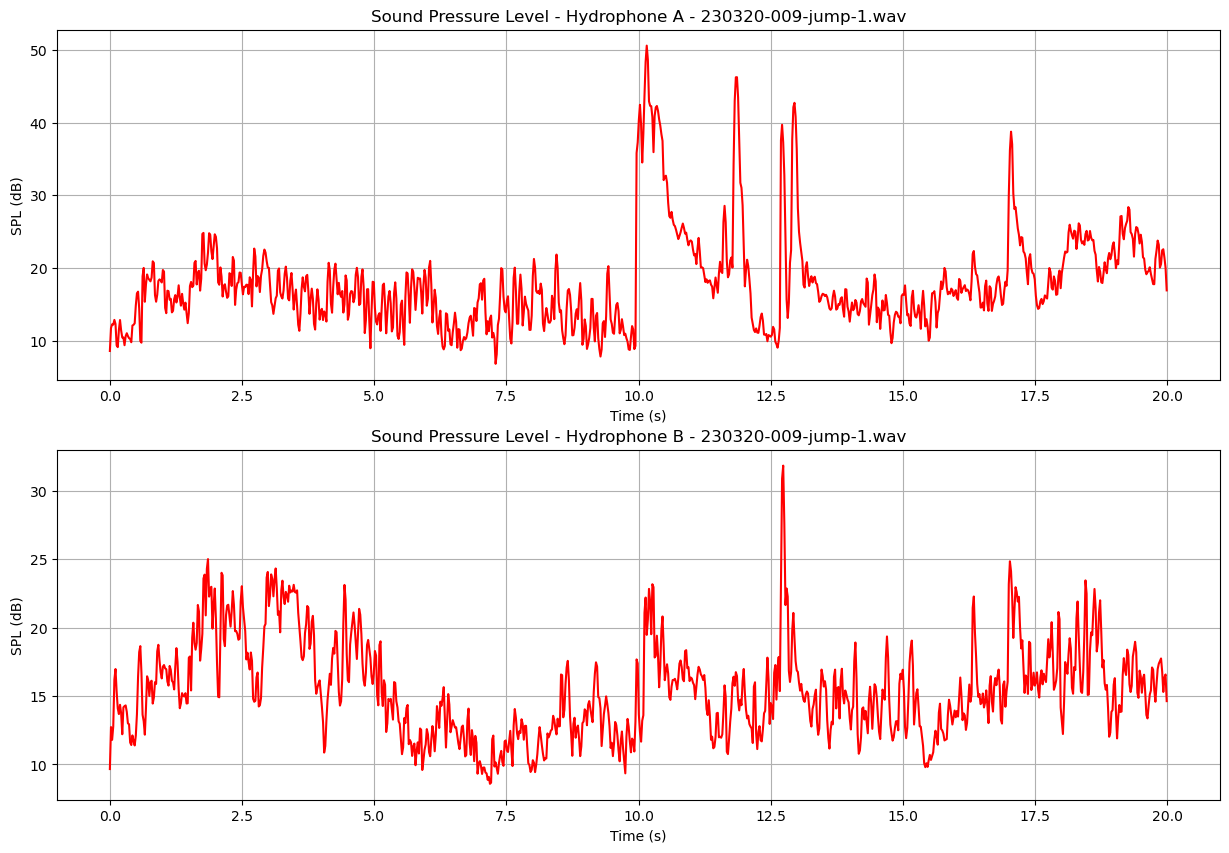

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(time, spl[0], color='red')
plt.title(f'Sound Pressure Level - Hydrophone A - {AUDIO_FILE}')
plt.xlabel('Time (s)')
plt.ylabel('SPL (dB)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, spl[1], color='red')
plt.title(f'Sound Pressure Level - Hydrophone B - {AUDIO_FILE}')
plt.xlabel('Time (s)')
plt.ylabel('SPL (dB)')
plt.grid()

plt.show()